In [7]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Data wrangling

### customerID is not a usefule column so delete it

In [9]:
df.shape


(7043, 21)

In [10]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4183,6917-IAYHD,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,33.60,33.6,No
190,7100-FQPRV,Male,0,Yes,Yes,43,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Credit card (automatic),71.90,3173.35,No
1485,9809-IMGCQ,Male,1,No,No,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.70,2082.95,Yes
4502,1264-BYWMS,Male,0,No,No,55,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.80,5283.95,Yes
3345,1335-HQMKX,Female,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,101.35,7323.15,No


In [11]:
df.drop('customerID', axis='columns',inplace=True)

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
## TotalCharges type is object, but it has to be a number
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
df_clean = df[df.TotalCharges!=' ']

In [15]:
print(df.shape)
print(df_clean.shape)

(7043, 20)
(7032, 20)


In [16]:
## convert to number
df_clean.TotalCharges = pd.to_numeric(df_clean.TotalCharges)

In [17]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### check if there's any other column which has empty space as a value

In [18]:
df_clean[(df_clean.TotalCharges==' ') | (df_clean.gender==' ')| (df_clean.SeniorCitizen ==' ')| (df_clean.Partner ==' ')| (df_clean.Dependents          ==' ')| (df_clean.tenure              ==' ')| (df_clean.PhoneService        ==' ')| (df_clean.MultipleLines       ==' ')| (df_clean.InternetService     ==' ')| (df_clean.OnlineSecurity      ==' ')| (df_clean.OnlineBackup        ==' ')| (df_clean.DeviceProtection          ==' ')| (df_clean.OnlineSecurity      ==' ')| (df_clean.StreamingTV               ==' ')| (df_clean.StreamingMovies           ==' ')| (df_clean.TechSupport               ==' ')| (df_clean.PaperlessBilling          ==' ')| (df_clean.PaymentMethod             ==' ')| (df_clean.Contract                  ==' ')| (df_clean.MonthlyCharges            ==' ')| (df_clean.TotalCharges                    ==' ')| (df_clean.Churn                           ==' ')].shape

(0, 20)

### Let's perform the EDA and understand the data more thoroughly

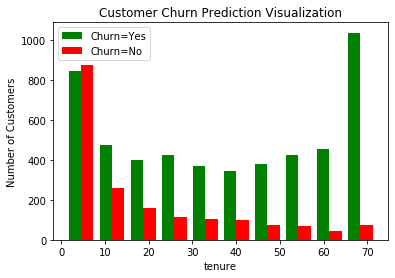

In [19]:
## histograms with tenured customers

tenure_churn_no = df_clean[df_clean.Churn=='No'].tenure
tenure_churn_yes = df_clean[df_clean.Churn=='Yes'].tenure


plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_no, tenure_churn_yes], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


In [27]:
## let's see the unique values in each of the columns of type object
def print_unique_col_values(df_in):
    for column in df_in:
        if df_in[column].dtypes=='object':
            print(f'{column} : {df_in[column].unique()}')

In [28]:
print_unique_col_values(df_clean)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [29]:
###  'No internet service' and  'No phone service' can be treated as 'No
df_clean.replace('No phone service','No', inplace=True)

In [30]:
df_clean.replace('No internet service','No', inplace=True)

In [33]:
## converting Yes No values to 1 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

df_clean.replace({'Yes':1,'No':0},inplace=True)            

In [52]:
def print_all_cols_with_type_Unique_values(df_In):
    for col in df_In:
        print(f'{col}:{df_In[col].unique()}')

In [53]:
print_all_cols_with_type_Unique_values(df_clean)

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [37]:
## Now replace Male and Female with 0 and 1
df_clean.gender.replace({'Female':1, 'Male':0},inplace=True)

In [54]:
print_all_cols_with_type_Unique_values(df_clean)

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [40]:
## Perform the One Hot Encoding on column:'InternetService','Contract','PaymentMethod' 
df_clean_ohe = pd.get_dummies(data=df_clean,columns=['InternetService','Contract','PaymentMethod'])

In [41]:
df_clean_ohe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [42]:
print(df_clean.shape)
print(df_clean_ohe.shape)

(7032, 20)
(7032, 27)


In [55]:
print_all_cols_with_type_Unique_values(df_clean_ohe)

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [50]:
### Need to perform scaling on the numeric columns so that the values are between 0 and 1 range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

##columns to scale:
col_to_scale = ['tenure','TotalCharges','MonthlyCharges']
df_clean_ohe[col_to_scale] = scaler.fit_transform(df_clean_ohe[col_to_scale])




In [56]:
print_all_cols_with_type_Unique_values(df_clean_ohe)

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [59]:
## Now our df is cleaned with OHE and Scaling
## ready for the training process
## lets form the X, y and then split train and test data

X = df_clean_ohe.drop(columns='Churn',axis='columns')
y = df_clean_ohe['Churn']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [61]:
print(X_train.shape)
print(X_test.shape)

(5625, 26)
(1407, 26)


In [62]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0


### setup the ANN with tensorflow
#### start with importing

#### The input layer is going to have 26 neurons as the no. of columns we have is 26
#### There is one hidden dense layer with 20 neurons
#### And one ouptut neuron with sigmoid as activation becuase we have the output as 1 or 0

In [63]:


from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])

In [69]:

##because the output is in 0 or 1 therefore using binary_crossentropy

model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 783us/step - loss: 0.3751 - accuracy: 0.8293
Epoch 2/100
176/176 [==============================] - 0s 831us/step - loss: 0.3762 - accuracy: 0.8256
Epoch 3/100
176/176 [==============================] - 0s 919us/step - loss: 0.3753 - accuracy: 0.8252
Epoch 4/100
176/176 [==============================] - 0s 838us/step - loss: 0.3758 - accuracy: 0.8267
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8254
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8274
Epoch 7/100
176/176 [==============================] - 0s 822us/step - loss: 0.3748 - accuracy: 0.8288
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3750 - accuracy: 0.8263
Epoch 9/100
176/176 [==============================] - 0s 844us/step - loss: 0.3760 - accuracy: 0.8268
Epoch 10/100
176/176 [==============================] - 0s 918us/step - loss: 0

In [70]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 648us/step - loss: 0.4694 - accuracy: 0.7733


[0.46939197182655334, 0.7732764482498169]

In [75]:
y_pred = model.predict(X_test)

In [76]:
y_pred[:5]

array([[0.30109417],
       [0.35435188],
       [0.0235    ],
       [0.83415216],
       [0.5391414 ]], dtype=float32)

In [77]:
###Convert the y_pred to a 1D array and also map the float value b/w 0-1 to 0 or a 1.
###if value < 0.5 then output 0 else 1

y_pred_updated = []

for i in y_pred:
    if i > 0.5:
        y_pred_updated.append(1)
    else:
        y_pred_updated.append(0)
        

In [78]:
y_pred_updated[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

#### Now let's look at the precision and confusion matrix of the model

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred_updated))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       999
           1       0.62      0.55      0.58       408

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



Text(69.0, 0.5, 'Truth')

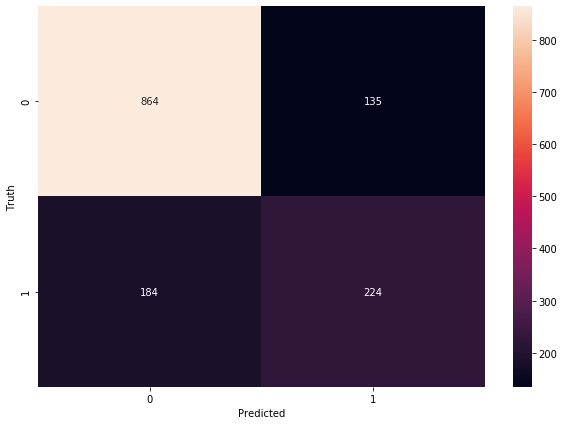

In [81]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels= y_test, predictions=y_pred_updated)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [85]:
acc = (864+224)/(864+135+184+224)
print(round(acc,2) )

## acc is exactly same as accuracy in the classification report

0.77
